Fitted model: quality ≈ 5.6290 + 0.3168 * chlorides


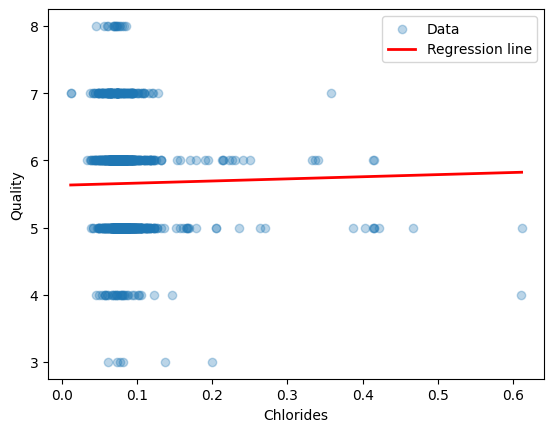

Regression coefficients (BGD):
Intercept (θ0): 5.62903543811072
Slope (θ1): 0.3167735586809789


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("WineQT.csv")

# Extract feature and target
X = df["chlorides"].values.reshape(-1, 1)
y = df["quality"].values

# Add bias (intercept) column
X_b = np.c_[np.ones((len(X), 1)), X]  # shape (m, 2)

# Initialize parameters
theta = np.random.randn(2, 1)  # [theta0, theta1]
eta = 0.1                      # learning rate
n_iterations = 1000
m = len(X_b)

# Gradient descent loop
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - eta * gradients

# Final parameters
theta0, theta1 = theta[0, 0], theta[1, 0]
print(f"Fitted model: quality ≈ {theta0:.4f} + {theta1:.4f} * chlorides")

# Plot regression line
plt.scatter(X, y, alpha=0.3, label="Data")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_b = np.c_[np.ones((len(x_line), 1)), x_line]
y_line = X_line_b.dot(theta)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.legend()
plt.show()



print("Regression coefficients (BGD):")
print(f"Intercept (θ0): {theta[0][0]}")
print(f"Slope (θ1): {theta[1][0]}")

Fitted model: quality ≈ 1.8870 + 0.3610 * alcohol
Regression coefficients (Normal Equation):
Intercept (θ0): 1.8870
Slope (θ1): 0.3610


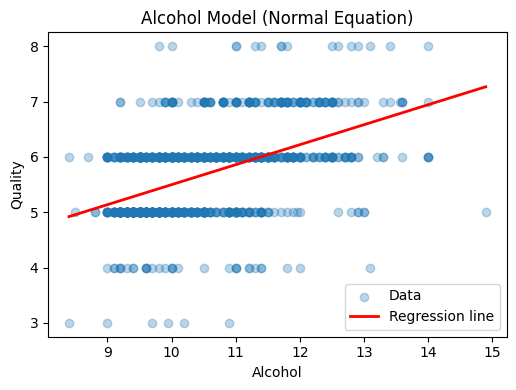

In [5]:
# Q1.3.2: Linear regression using Normal Equation (alcohol vs quality)
df = pd.read_csv("WineQT.csv")
X = df["alcohol"].values.reshape(-1, 1)
y = df["quality"].values
X_b = np.c_[np.ones((len(X), 1)), X]

# Normal Equation: θ = (X_b^T * X_b)^(-1) * X_b^T * y
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta0, theta1 = theta[0], theta[1]
print(f"Fitted model: quality ≈ {theta0:.4f} + {theta1:.4f} * alcohol")

# Plot regression line for alcohol
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.3, label="Data")
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_b = np.c_[np.ones((len(x_line), 1)), x_line]
y_line = X_line_b.dot(theta)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol Model (Normal Equation)")
plt.legend()

print("Regression coefficients (Normal Equation):")
print(f"Intercept (θ0): {theta0:.4f}")
print(f"Slope (θ1): {theta1:.4f}")

plt.tight_layout()
plt.show()